In [17]:
import pandas as pd
import numpy as np
# Load the dataset
df_ev_chargers = pd.read_csv('EV_Count_State.csv')

# Remove total row and check for missing data
df_ev_chargers = df_ev_chargers[df_ev_chargers['State/UT'] != 'Total']
df_ev_chargers.dropna(inplace=True)

# Preview the dataset
print(df_ev_chargers.head())


         State/UT  No. of EV Chargers Sanctioned
0     Maharashtra                            317
1  Andhra Pradesh                            266
2      Tamil Nadu                            281
3         Gujarat                            278
4   Uttar Pradesh                            207


In [2]:
# Basic statistical summary of the dataset
print(df_ev_chargers['No. of EV Chargers Sanctioned'].describe())


count     25.000000
mean     115.080000
std      105.731941
min       10.000000
25%       25.000000
50%       70.000000
75%      207.000000
max      317.000000
Name: No. of EV Chargers Sanctioned, dtype: float64


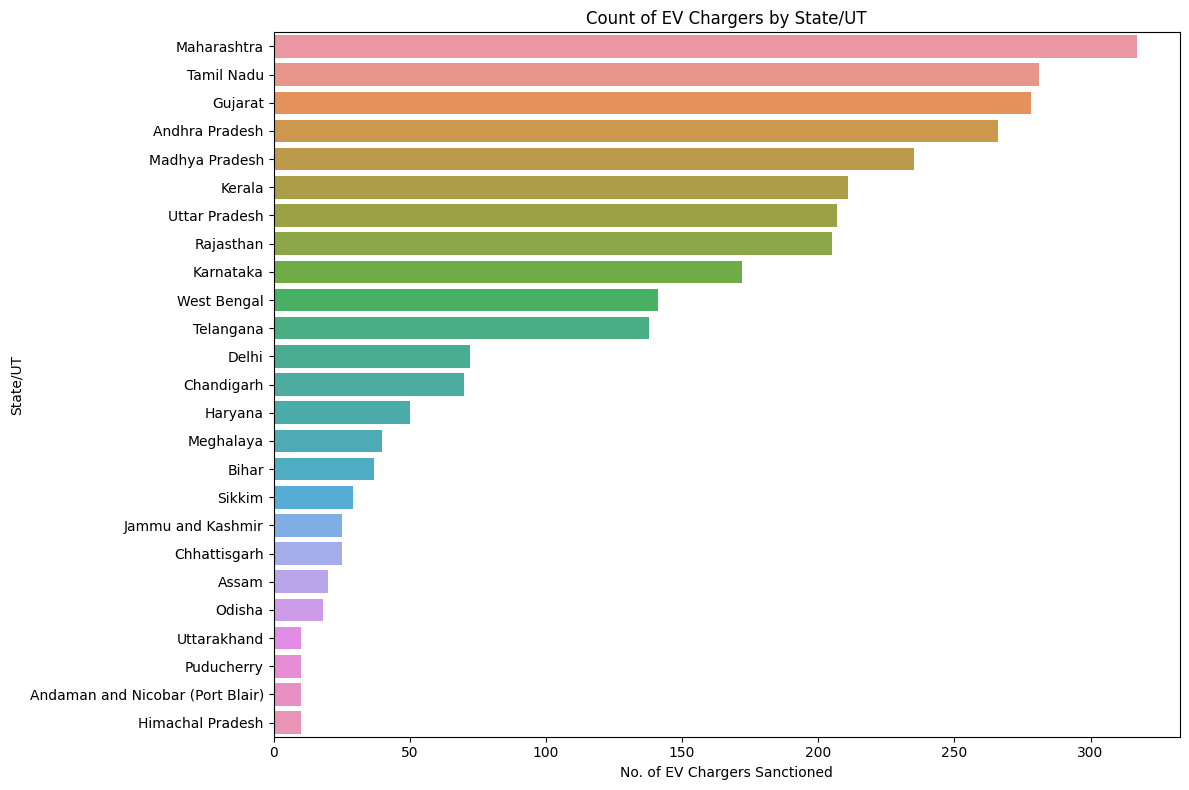

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='No. of EV Chargers Sanctioned', y='State/UT', data=df_ev_chargers.sort_values(by='No. of EV Chargers Sanctioned', ascending=False))
plt.title('Count of EV Chargers by State/UT')
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('State/UT')
plt.tight_layout()
plt.savefig('a.jpg')
plt.show()


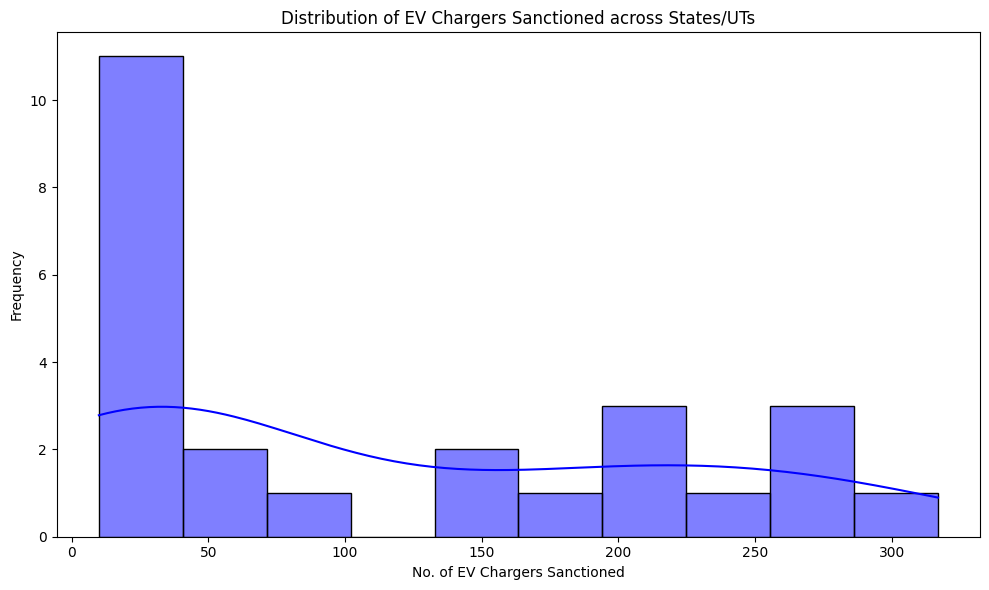

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ev_chargers['No. of EV Chargers Sanctioned'], bins=10, kde=True, color='blue')
plt.title('Distribution of EV Chargers Sanctioned across States/UTs')
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("b.jpg")
plt.show()


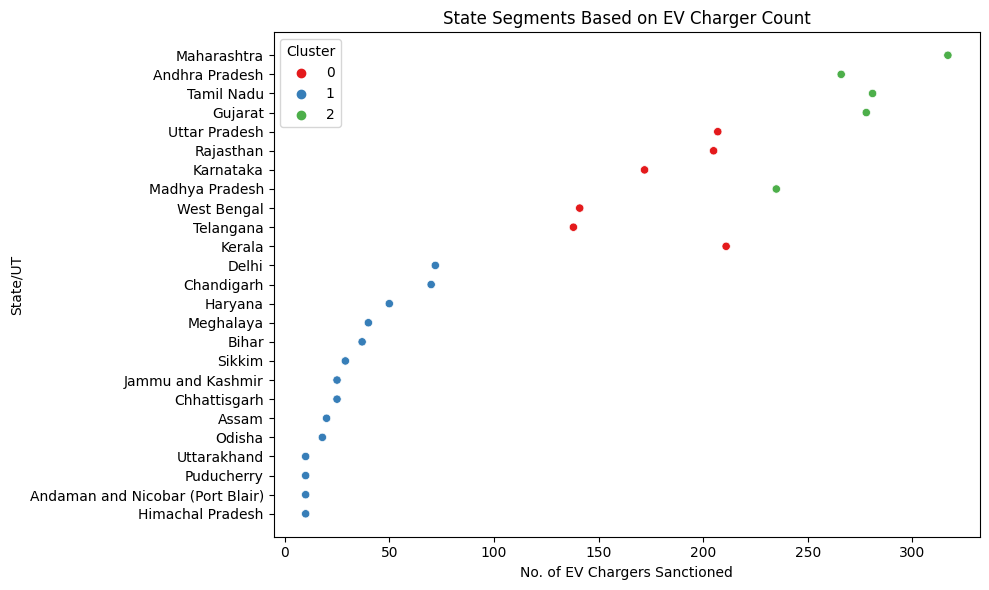

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scaling the data
scaler = StandardScaler()
df_ev_chargers['Chargers_Scaled'] = scaler.fit_transform(df_ev_chargers[['No. of EV Chargers Sanctioned']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_ev_chargers['Cluster'] = kmeans.fit_predict(df_ev_chargers[['Chargers_Scaled']])

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No. of EV Chargers Sanctioned', y='State/UT', hue='Cluster', data=df_ev_chargers, palette='Set1')
plt.title('State Segments Based on EV Charger Count')
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('State/UT')
plt.tight_layout()
plt.savefig("c.jpg")
plt.show()


In [8]:
# Summarize each cluster's average charger count
segment_summary = df_ev_chargers.groupby('Cluster')['No. of EV Chargers Sanctioned'].mean()
print(segment_summary)


Cluster
0    179.000000
1     30.428571
2    275.400000
Name: No. of EV Chargers Sanctioned, dtype: float64


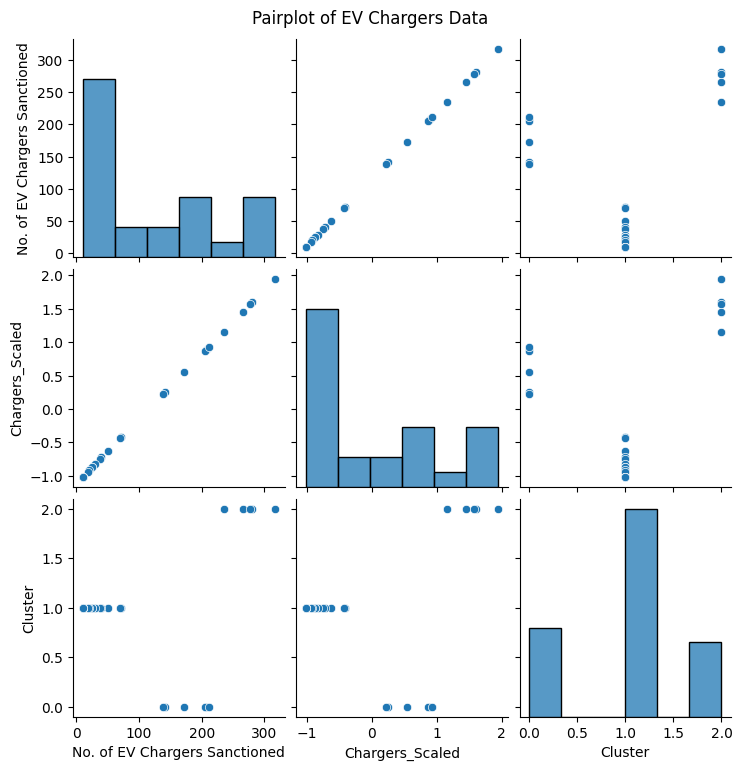

In [23]:
sns.pairplot(df_ev_chargers)
plt.suptitle("Pairplot of EV Chargers Data", y=1.02)
plt.savefig("d.jpg")
plt.show()


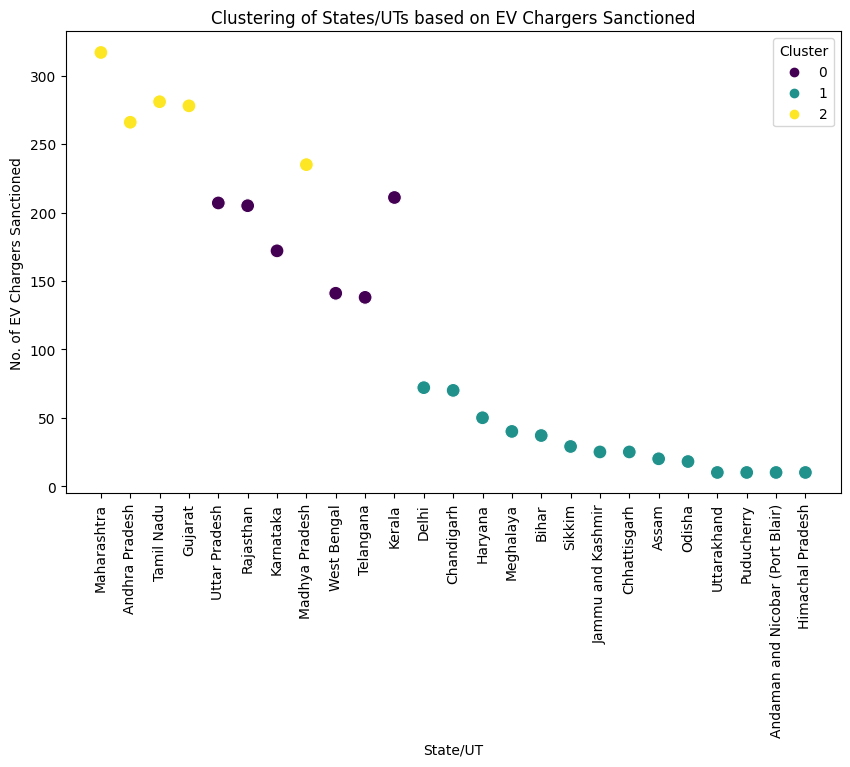

Cluster Centers (Scaled):
 [[ 0.6170139 ]
 [-0.81713247]
 [ 1.54755425]]


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ev_chargers[['No. of EV Chargers Sanctioned']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_ev_chargers['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State/UT', y='No. of EV Chargers Sanctioned', hue='Cluster', palette='viridis', data=df_ev_chargers, s=100)
plt.title('Clustering of States/UTs based on EV Chargers Sanctioned')
plt.xticks(rotation=90)
plt.savefig('e.jpg')
plt.show()

# Print out the cluster centers
print("Cluster Centers (Scaled):\n", kmeans.cluster_centers_)


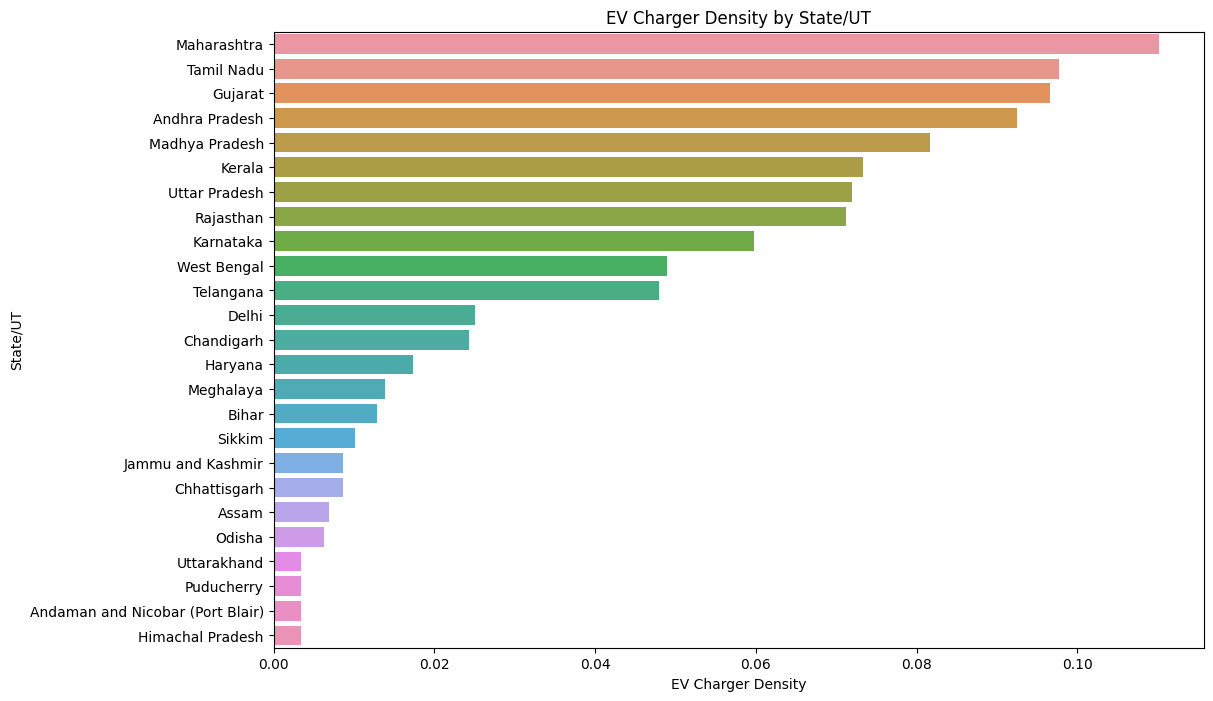

In [14]:
df_ev_chargers['EV_Charge_Density'] = df_ev_chargers['No. of EV Chargers Sanctioned'] / df_ev_chargers['No. of EV Chargers Sanctioned'].sum()

# Sort by density for better visualization
df_sorted_density = df_ev_chargers.sort_values(by='EV_Charge_Density', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='EV_Charge_Density', y='State/UT', data=df_sorted_density)
plt.title('EV Charger Density by State/UT')
plt.xlabel('EV Charger Density')
plt.ylabel('State/UT')
plt.show()


In [15]:
# Group by cluster and summarize
cluster_summary = df_ev_chargers.groupby('Cluster')['No. of EV Chargers Sanctioned'].describe()
print("Cluster Profiling Summary:\n", cluster_summary)

# Adding custom profiling logic
for i in range(3):
    cluster = df_ev_chargers[df_ev_chargers['Cluster'] == i]
    print(f"\nCluster {i} includes states with high EV charger sanctioning density.")
    print(cluster['State/UT'].values)


Cluster Profiling Summary:
          count        mean        std    min     25%    50%     75%    max
Cluster                                                                   
0          6.0  179.000000  33.639263  138.0  148.75  188.5  206.50  211.0
1         14.0   30.428571  21.132237   10.0   12.00   25.0   39.25   72.0
2          5.0  275.400000  29.534725  235.0  266.00  278.0  281.00  317.0

Cluster 0 includes states with high EV charger sanctioning density.
['Uttar Pradesh' 'Rajasthan' 'Karnataka' 'West Bengal' 'Telangana'
 'Kerala']

Cluster 1 includes states with high EV charger sanctioning density.
['Delhi' 'Chandigarh' 'Haryana' 'Meghalaya' 'Bihar' 'Sikkim'
 'Jammu and Kashmir' 'Chhattisgarh' 'Assam' 'Odisha' 'Uttarakhand'
 'Puducherry' 'Andaman and Nicobar (Port Blair)' 'Himachal Pradesh']

Cluster 2 includes states with high EV charger sanctioning density.
['Maharashtra' 'Andhra Pradesh' 'Tamil Nadu' 'Gujarat' 'Madhya Pradesh']


In [18]:
# Segmenting states into categories based on charger numbers
conditions = [
    (df_ev_chargers['No. of EV Chargers Sanctioned'] > 250),
    (df_ev_chargers['No. of EV Chargers Sanctioned'] > 100) & (df_ev_chargers['No. of EV Chargers Sanctioned'] <= 250),
    (df_ev_chargers['No. of EV Chargers Sanctioned'] <= 100)
]

choices = ['High Potential', 'Moderate Potential', 'Low Potential']

df_ev_chargers['Market Segment'] = np.select(conditions, choices, default='Unknown')

# Display the categorized states
print(df_ev_chargers[['State/UT', 'No. of EV Chargers Sanctioned', 'Market Segment']])


                            State/UT  No. of EV Chargers Sanctioned   
0                        Maharashtra                            317  \
1                     Andhra Pradesh                            266   
2                         Tamil Nadu                            281   
3                            Gujarat                            278   
4                      Uttar Pradesh                            207   
5                          Rajasthan                            205   
6                          Karnataka                            172   
7                     Madhya Pradesh                            235   
8                        West Bengal                            141   
9                          Telangana                            138   
10                            Kerala                            211   
11                             Delhi                             72   
12                        Chandigarh                             70   
13    